# Getting The System Readdy

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



## Loading The Data

In [73]:
df = pd.read_csv('../data/USA Housing Dataset.csv')

In [74]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


# Inspecting The Data


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [76]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.0,26590000.00
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.0,8.00
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.5,6.75
sqft_living,4140.0,2143.638889,957.481621,370.0,1470.00,1980.00,2620.0,10040.00
sqft_lot,4140.0,14697.638164,35876.838123,638.0,5000.00,7676.00,11000.0,1074218.00
floors,4140.0,1.514130,0.534941,1.0,1.00,1.50,2.0,3.50
waterfront,4140.0,0.007488,0.086219,0.0,0.00,0.00,0.0,1.00
view,4140.0,0.246618,0.790619,0.0,0.00,0.00,0.0,4.00
condition,4140.0,3.452415,0.678533,1.0,3.00,3.00,4.0,5.00
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.0,8020.00


# Exploratory Data Analysis


### Identifying Output Variable


In [ ]:
out_var = 'price'
features = df.columns.drop(out_var).tolist()


## Numerical Data Analysis

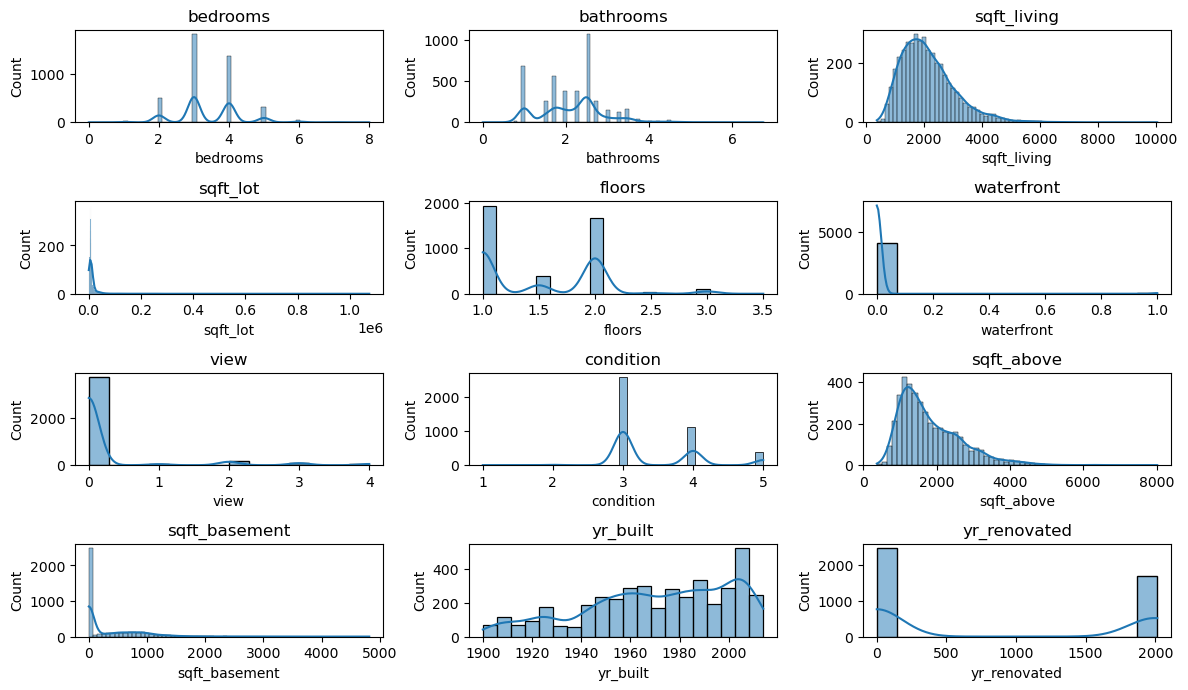

In [78]:
numerical_cols = df[features].select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

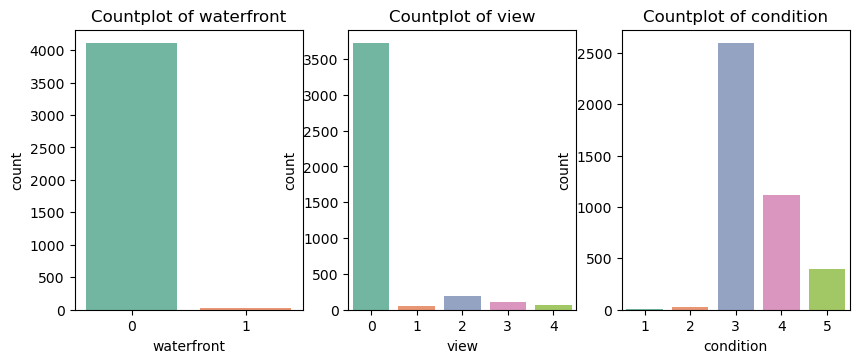

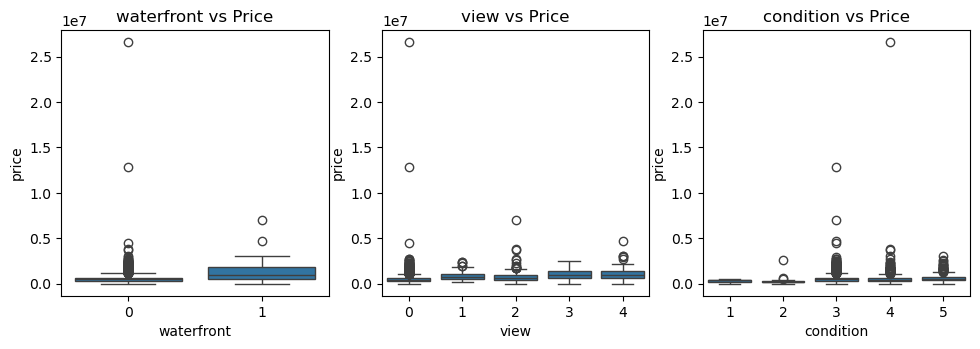

In [79]:
categorical_cols = ['waterfront', 'view', 'condition']  # adjust as needed

plt.figure(figsize=(10,8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col, data=df, palette='Set2', hue=col,legend=False)
    plt.title(f'Countplot of {col}')
plt.show()
plt.figure(figsize=(20,20))

for i, col in enumerate(categorical_cols):
    # Boxplot to see effect on price
    plt.subplot(5,5,i+1)
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'{col} vs Price')
plt.show()

The counts of both houeses with a waterfront and houses with a view rating larger than is minimal, and can therfore be dropped with the reason that they will have a small impact on the overall result.
Outliers are detected in the box plots. There seems to be a few houses with a very high price. These houses are likely to be outliers and can be removed.

## Correlation Matrix for Price

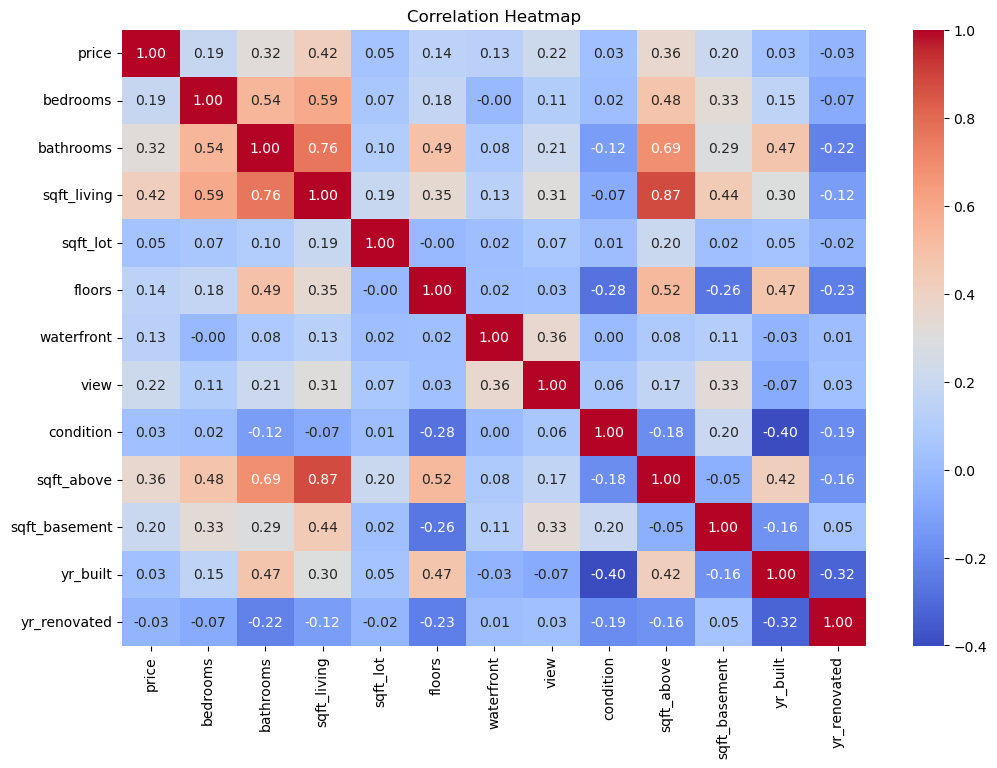

In [80]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Box Plots

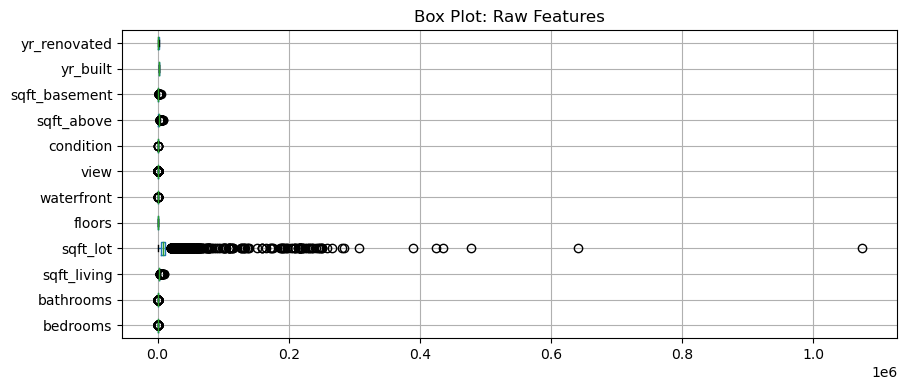

In [81]:
fig, ax = plt.subplots(figsize =(10,4))
boxplot =df[features].boxplot(vert = 0, ax=ax)
_ = ax.set_title(f'Box Plot: Raw Features')

# Data Preperation

This was just me testing, feel free to change/ redo

In [82]:
# df = df.drop(columns=['country', 'statezip','street', 'yr_renovated', 'city', 'waterfront', 'sqft_lot', 'date','yr_renovated' ])
vars = df[features].columns
features = vars.drop(['yr_renovated', 'waterfront', 'yr_renovated', 'view', 'yr_built']).tolist()

In [83]:
df = df.dropna(subset=['price'])  # Drop rows with no price
# df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
# df['view'].fillna(df['view'].mode()[0], inplace=True)

In [84]:
df = df[df['bedrooms'] <= 7]
df = df[df['bathrooms'] <= 4]

In [85]:
df['sqft_living'] = np.log1p(df['sqft_living'])  # +1 to avoid log(0)
df['sqft_above'] = np.log1p(df['sqft_above'])
df['sqft_basement'] = np.log1p(df['sqft_basement'])
df['sqft_lot'] = np.log1p(df['sqft_lot'])

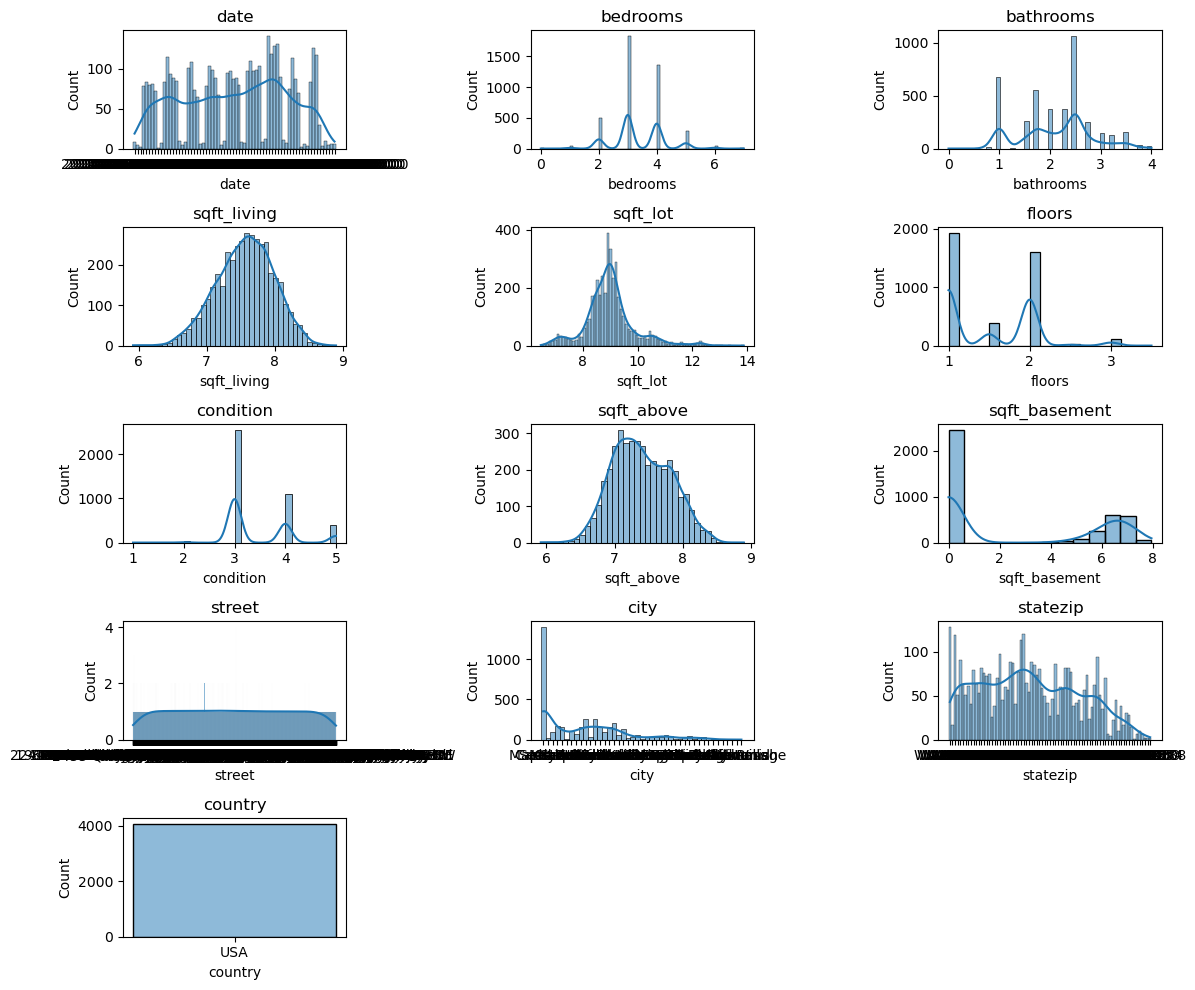

In [86]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

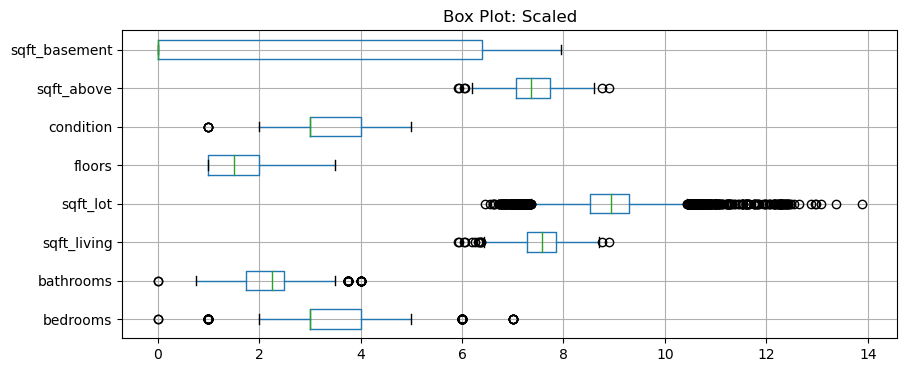

In [87]:
fig, ax = plt.subplots(figsize =(10,4))
boxplot =df[features].boxplot(vert = 0, ax=ax)
_ = ax.set_title(f'Box Plot: Scaled')


In [88]:

df['total_sqft'] = df['sqft_above'] + df['sqft_basement'] + df['sqft_lot'] + df['sqft_living']
features.append('total_sqft')

vars = df[features].columns
features = vars.drop(['sqft_above','sqft_basement','sqft_lot', 'sqft_living']).tolist()

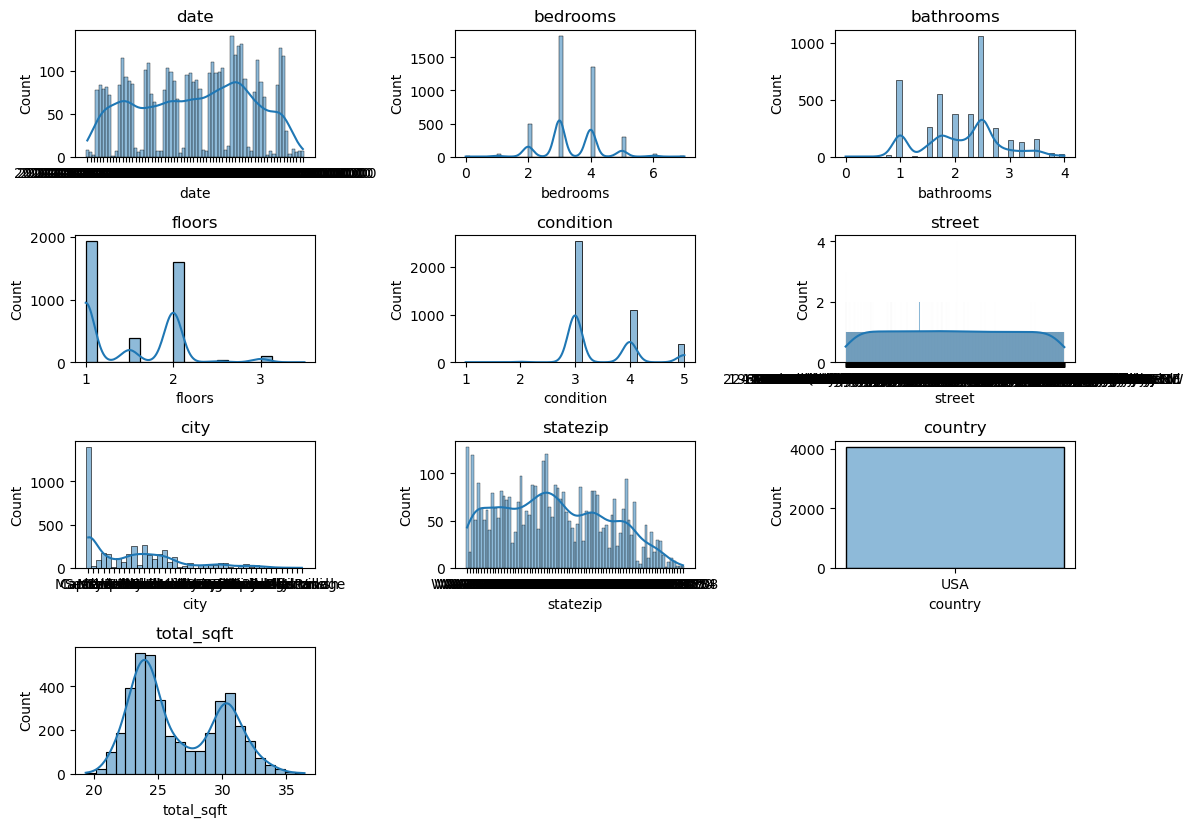

In [89]:
# features.insert('total_sqft', total_sqft)
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [90]:
scaler = StandardScaler()
num_cols = ['total_sqft', 'bathrooms', 'bedrooms']
df[num_cols] = scaler.fit_transform(df[num_cols])

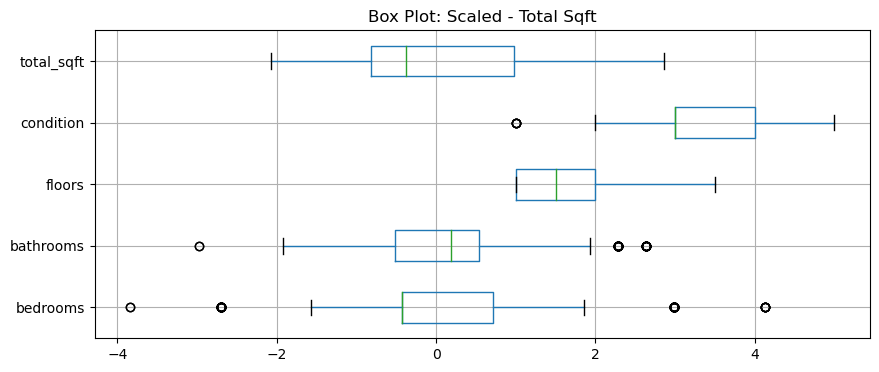

In [91]:
fig, ax = plt.subplots(figsize =(10,4))
boxplot =df[features].boxplot(vert = 0, ax=ax)
_ = ax.set_title(f'Box Plot: Scaled - Total Sqft')